### Description: A simple and fully reproducible example of Bayesian linear regression with PyMC3  
#### Author: @conormacd  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm


import matplotlib as mpl

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_style("whitegrid")

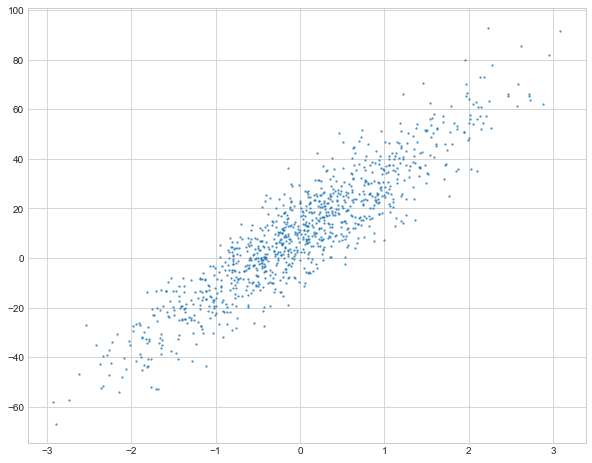

In [17]:
n = 1000
x = np.random.normal(size=n)
y = 10 + 23 * x + np.random.normal(loc=0, scale=10, size=n)
plt.scatter(x, y, alpha = .6, s=2);

In [18]:
lm = pm.Model()
with lm:
    
    a = pm.Normal("a", 5, sd=3)
    b = pm.Normal("b", .9, sd=3)
    e = pm.HalfCauchy("e", 1)
    
    u = a + b * x 
    yhat = pm.Normal("yhat", u, e, observed=y)
    
    out = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/conormd/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [e_log__, b, a]
100%|██████████| 1000/1000 [00:01<00:00, 991.71it/s]


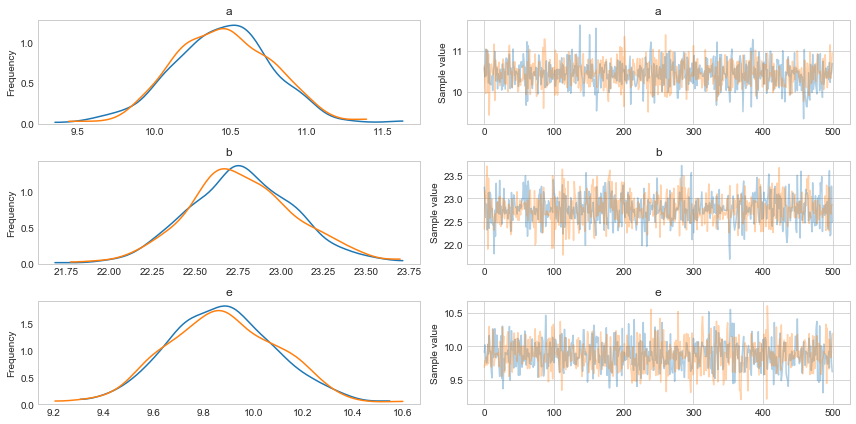

In [5]:
pm.traceplot(out);

In [19]:
pm.summary(out)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,9.655566,0.314863,0.007433,9.042749,10.264634,1000.0,0.999750
b,22.386286,0.319299,0.007938,21.819404,23.061643,1000.0,0.999264
e,9.931294,0.216196,0.005824,9.543302,10.360844,1000.0,0.999034


In [20]:
yhat_preds = pm.sample_ppc(out, model=lm, samples=10)
yhat_preds = yhat_preds["yhat"].T
print(yhat_preds[:10])
print(yhat_preds.shape)

100%|██████████| 10/10 [00:00<00:00, 129.87it/s]

[[ 13.00624971  13.28196249   3.47890567  14.74872763  23.86672883
   -5.9492048   -5.44558847   1.02743119  11.00432928   3.83845963]
 [ 24.93311848  11.01322361   6.77228318   9.30944758  -0.88702782
    1.62902539  22.22611324  12.08657713  -0.46270368  15.83745183]
 [  2.00359308   2.50993696  -0.18956543   6.35549937  -1.84533071
    1.33632415   7.10290495   1.5836636   13.90513321   0.61571587]
 [-16.07382049 -20.70012307  -9.94287566 -28.65379727 -32.35108377
  -18.05734403 -20.11681286 -27.56792727 -10.70704757 -23.3736697 ]
 [-19.9710734  -12.34033147 -30.31428    -16.27526151 -18.10064805
  -13.61120765 -13.2500565  -36.00790284 -12.82735725 -13.65517144]
 [ 34.46880427  27.68131361  26.2297294   24.3910732   44.34700122
   14.88011693  26.59652332  37.62882278  11.92182834  13.00040137]
 [ -8.26491149   0.4600776  -11.78450684   5.77783932   5.11803834
  -15.50177302   2.17941562 -23.31005285 -17.50308041 -23.83944608]
 [  9.70709297   7.91339383  19.36311549  22.82742451  

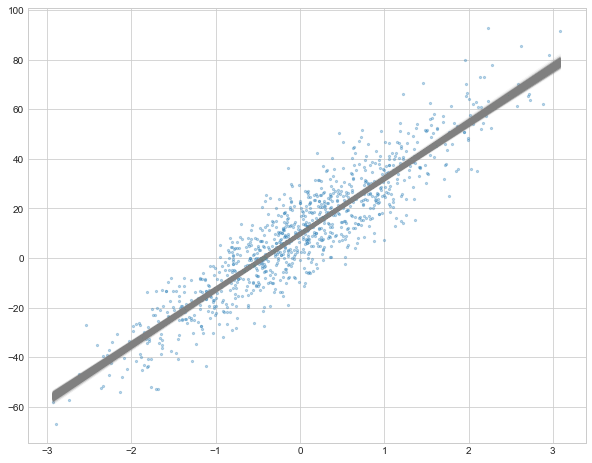

In [21]:
plt.scatter(x, y, alpha=.3, s=5)
for i in range(500):
    plt.plot(x, out["a"][i] + out["b"][i] * x, alpha=.05, c="gray")

Text(0,0.5,'coefficient b space')

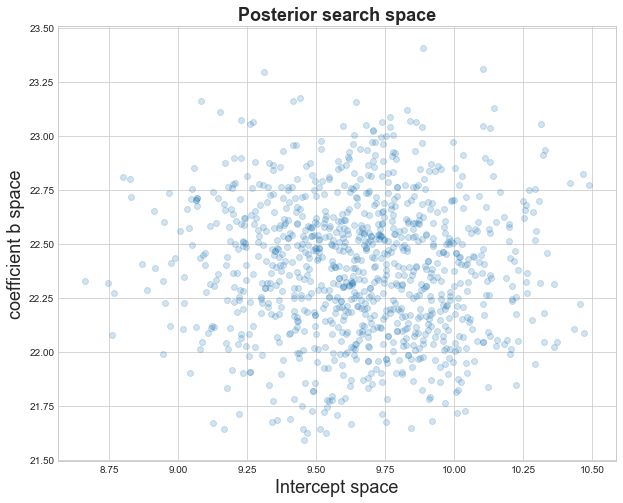

In [22]:
fontsize = 18
plt.scatter(out["a"], out["b"], alpha=.2)
plt.title("Posterior search space", fontsize=fontsize, fontweight="bold")
plt.xlabel("Intercept space", fontsize=fontsize)
plt.ylabel("coefficient b space", fontsize=fontsize)